In [20]:
import os
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Used Google Colab, so mouting the drive
drive.mount('/content/drive')

# Dataset is uploaded in the Google Drive
datapath = '/content/drive/My Drive/Colab Notebooks/'
os.path.exists(datapath)

house_price_prediction_data = pd.read_csv(datapath + "data.csv")
house_predictions = house_price_prediction_data;

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# Describing the house_prediction_data to see different variables that we will be working with
house_predictions.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ca54fbb80>,
      dtype=object)

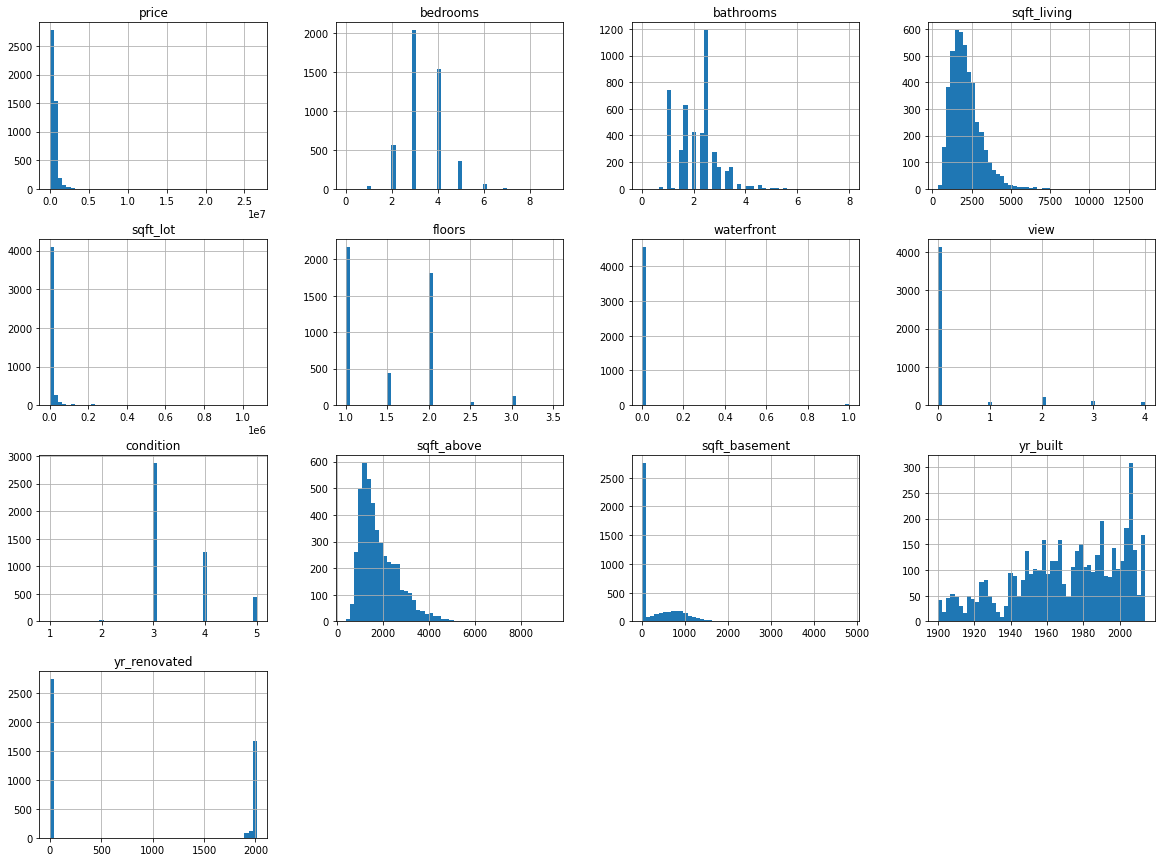

In [22]:
# Created a histogram of the different variables to see how their points are distributed
house_predictions.hist(bins=50, figsize=(20,15))

Ignore the date

In [23]:
# Removing the date because it is not necessary to work with
house = house_predictions.drop(columns="date", axis = 1)

In [24]:
# Getting the name of all the variables in the data
c = house.columns
c

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country'],
      dtype='object')

In [25]:
# Using this for loop to print out the distribution in the variables to get a better understanding on categorical vs. continuous variables
for i in c:
    print(i)
    print(house[i].value_counts(dropna=False))
    print("\n")

price
0.0          49
300000.0     42
400000.0     31
440000.0     29
450000.0     29
             ..
684680.0      1
609900.0      1
1635000.0     1
1339000.0     1
220600.0      1
Name: price, Length: 1741, dtype: int64


bedrooms
3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: bedrooms, dtype: int64


bathrooms
2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
1.50     291
2.75     276
3.00     167
3.50     162
3.25     136
3.75      37
4.50      29
4.25      23
4.00      23
0.75      17
4.75       7
5.00       6
5.25       4
5.50       4
1.25       3
6.25       2
0.00       2
8.00       1
5.75       1
6.50       1
6.75       1
Name: bathrooms, dtype: int64


sqft_living
1940     32
1720     32
1660     31
1840     31
2000     30
         ..
2732      1
2009      1
1295      1
10040     1
2538      1
Name: sqft_living, Length: 566, dtype: int64


sqft_lot
5000     80
6000     65
4000     54


In [26]:
# Setting up some variables, containing the continuous and categorical variables
continuous = house[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','yr_built', 'yr_renovated']]
categorical = house[['bedrooms','bathrooms','floors','waterfront','view','condition','street','city','statezip','country']]

In [27]:
# Dropping all the prices that are equal to 0 because they are considered invalid
house = house.drop(house.index[(house["price"] == 0.0)])
house["price"].value_counts(dropna=False)

300000.0     42
400000.0     31
600000.0     29
440000.0     29
450000.0     29
             ..
325900.0      1
684680.0      1
609900.0      1
1635000.0     1
220600.0      1
Name: price, Length: 1740, dtype: int64

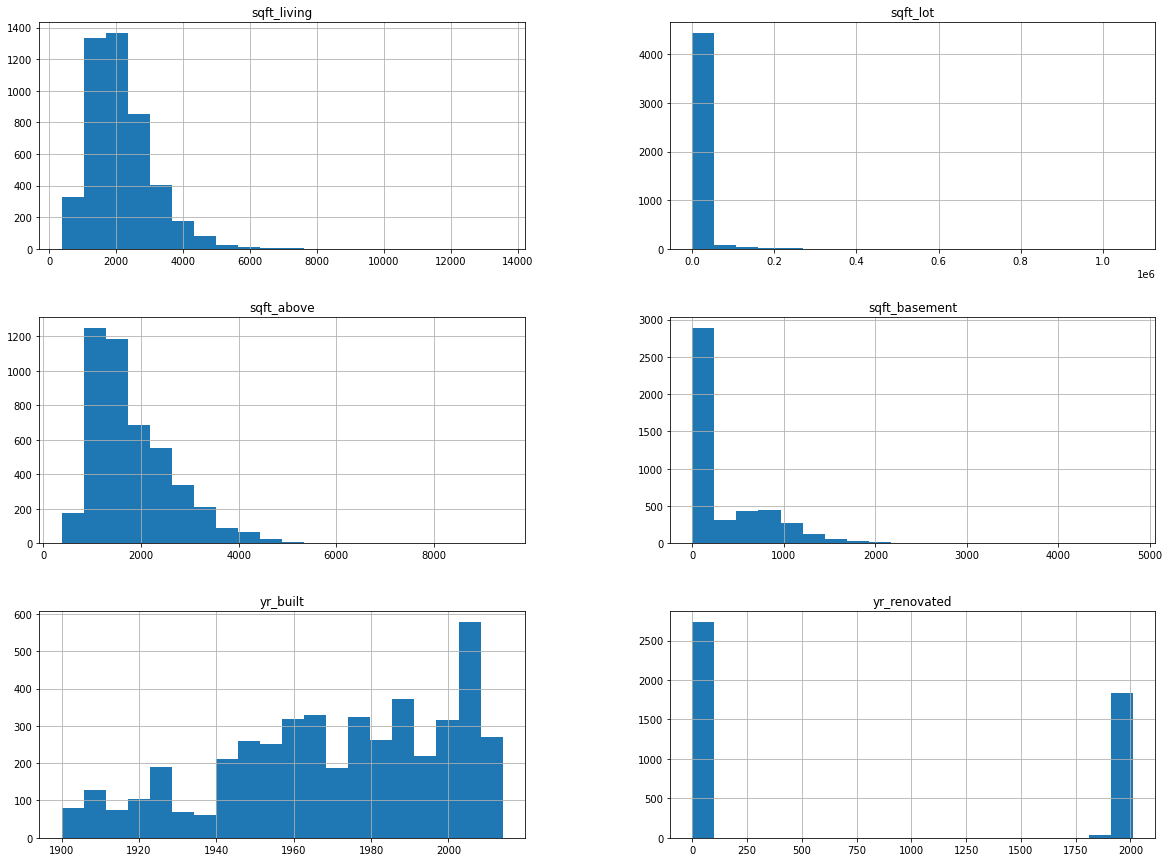

In [28]:
# Plotting some histograms of all the continuous variables
%matplotlib inline
continuous.hist(figsize=(20,15),bins=20)
plt.show()

sqft_living


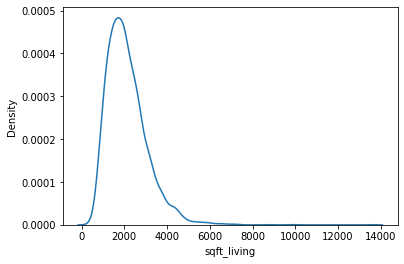

sqft_lot


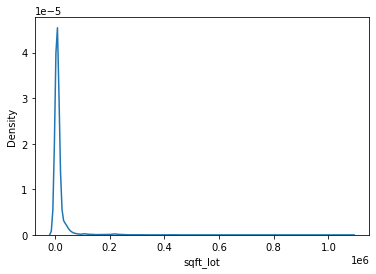

sqft_above


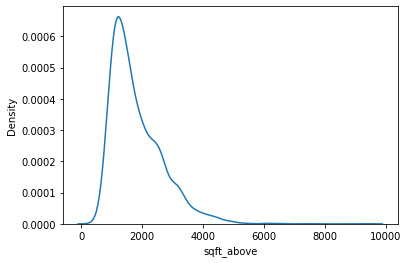

sqft_basement


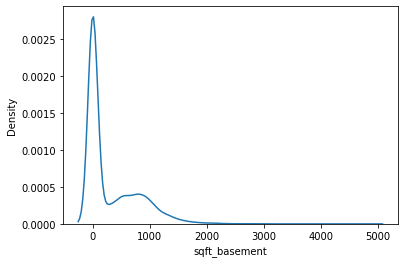

yr_built


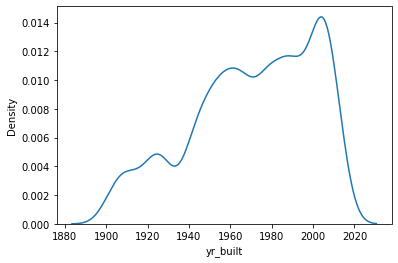

yr_renovated


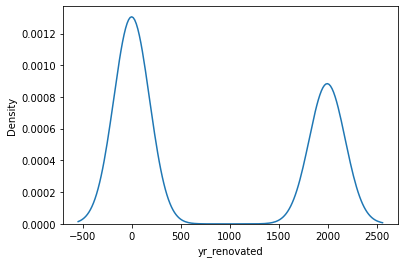

In [29]:
# Taking the continuous variables and plotting them again to get a better understanding of their distribution
for i in continuous:
    print(i)
    sns.kdeplot(house[i])
    plt.show()

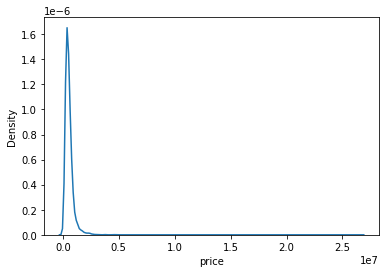

In [30]:
# Plotting the target variable alone
sns.kdeplot(house["price"])
plt.show()

The biggest thing I noticed was that the yr_renovated continuous variable is either 0 if it has not been renovated or the year it was renovated if it was renovated.

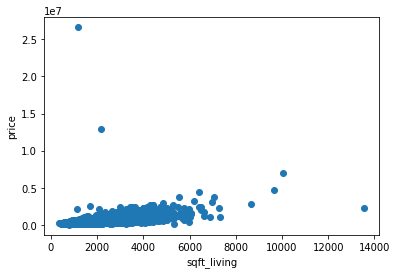

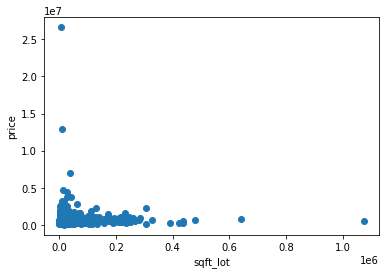

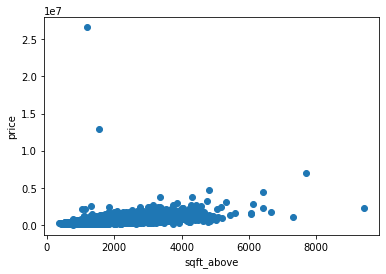

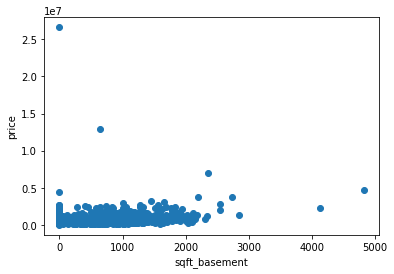

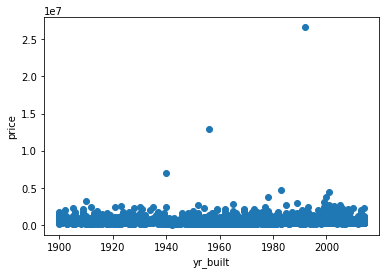

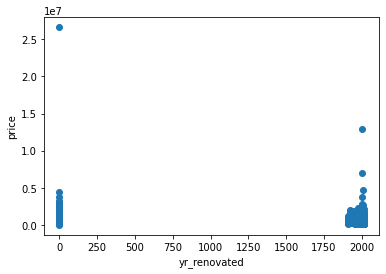

In [31]:
# PLotting all the continuous variables in a scatter plot
for i in continuous:
    plt.scatter(house[i], house["price"])
    plt.xlabel(i)
    plt.ylabel("price")
    plt.show()

In [32]:
# Splitting the training and test data using random permutations from the length of the data.
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]   

In [33]:
# Setting up the training and testing data, from the split we chose and then then printing their amount
train_set, test_set = split_train_test(house, 0.2)
print(len(train_set), "train +", len(test_set), "test")

3641 train + 910 test


In [34]:
# Importing several sklearn packages to create a pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Setting up the pipeline with a median strategy and using the StandardScaler()
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

# Defining which categorical variables are numbers and just categorical
num_attr = ["bedrooms", "bathrooms", "floors", "waterfront", "view", "condition"]
cat_attr = ['street','city','statezip','country']

# With the pipeline, transforiming the categorical data with ColumnTransformer
pipeline = ColumnTransformer([
        ("num_pipeline", num_pipeline, num_attr),
        ("cat_pipeline", OneHotEncoder(), cat_attr),
    ])

# Creating a variable which is set the the pipeline which is set to fit the training set
housing_prep = pipeline.fit_transform(train_set)

In [35]:
# Checking the housing_prep pipeline
housing_prep

<3641x3720 sparse matrix of type '<class 'numpy.float64'>'
	with 36410 stored elements in Compressed Sparse Row format>

In [36]:
# Checking the shape of the pipeline
housing_prep.shape

(3641, 3720)

In [37]:
# Importing the package for linear regression
from sklearn.linear_model import LinearRegression

# Creating a variable of the training set set to the price
house_label = train_set["price"].copy()

# Fitting a linear regression model to the pipeline and price
lin_reg = LinearRegression()
lin_reg.fit(housing_prep, house_label)

LinearRegression()

In [38]:
# Testing the full preprocessing pipeline on a few training instances
some_data = train_set.iloc[:5]
some_labels = house_label.iloc[:5]
some_data_prepared = pipeline.transform(some_data)

# Printing out the linear regression predictions
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 260000.00226619  460000.01652812  445000.00175598   99999.97640816
 1210000.00112843]


In [39]:
# Printing out labels, with a list defined with the price variable
print("Labels:", list(some_labels))

Labels: [260000.0, 460000.0, 445000.0, 100000.0, 1210000.0]


In [40]:
lin_reg.score(housing_prep, house_label)

0.9997375050112841

In [41]:
# Importing the Ridge package
from sklearn.linear_model import Ridge

# Calling the ridge function on the pipeline against the price
ridge = Ridge().fit(housing_prep, house_label)
print("Ridge Score : {:.3f}".format(ridge.score(housing_prep, house_label)))

Ridge Score : 0.809


In [42]:
# Importing the Lasso package
from sklearn.linear_model import Lasso

# Calling the lasso function on the pipeline against the price
lasso = Lasso(alpha=0.5)
lasso.fit(housing_prep, house_label)
print("Lasso Score : {:.3f}".format(lasso.score(housing_prep, house_label)))

Lasso Score : 1.000


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 740280460600.7886, tolerance: 129020575403.78711
  model = cd_fast.sparse_enet_coordinate_descent(


In [43]:
# Importing the ElasticNet package
from sklearn.linear_model import ElasticNet

# Calling the Elastic function on the pipeline against the price
elasticnet = ElasticNet(alpha=1.0, l1_ratio=0.5)
elasticnet.fit(housing_prep, house_label)
print("ElasticNet Score : {:.3f}".format(elasticnet.score(housing_prep, house_label)))

ElasticNet Score : 0.134
